<a href="https://colab.research.google.com/github/sole3/T5_EDA/blob/main/Final_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install dash

     |████████████████████████████████| 7.3 MB 5.2 MB/s 
     |████████████████████████████████| 25.3 MB 62 kB/s 
     |████████████████████████████████| 357 kB 59.7 MB/s 
  Created wheel for dash-core-components: filename=dash_core_components-2.0.0-py3-none-any.whl size=3821 sha256=ff03a7fbc5831a7477c67fecefda1364b126a968146cdbb5a2807c4c056aeda4
  Stored in directory: /root/.cache/pip/wheels/00/f9/c7/1a6437d794ed753ea9bc9079e761d4fc803a1f1f5d3697b9ec
  Created wheel for dash-html-components: filename=dash_html_components-2.0.0-py3-none-any.whl size=4089 sha256=a5d8607da83a8c9bc21084d9064f9700b83a4f2ca03151ccd3f4c941f16e1e26
  Stored in directory: /root/.cache/pip/wheels/ec/6b/81/05aceabd8b27f724e2c96784016287cc1bfbc349ebfda451de
  Created wheel for dash-table: filename=dash_table-5.0.0-py3-none-any.whl size=3911 sha256=20e888710815a720696885c564cee2b7652b4978b411906cde0fed0b703ba8e9
  Stored in directory: /root/.cache/pip/wheels/85/5d/4e/7c276b57992951dbe770bf5caad6448d0539c510663aefd

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px
import plotly.graph_objects as go

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import sys


In [3]:
#import the dataset and read it
df = pd.read_csv("dataset.csv")

In [6]:
#show the first 10 rows
df.head(10) 

,Gender,Location,Age.Band,Age,Completion.Time,Part.A.Score,Part.B.Score,Part.C.Score
0,M,B,U,11,52,21,9.0,67
1,F,B,Y,37,61,72,29.0,66
2,M,B,U,5,39,19,4.0,24
3,M,C,O,70,63,65,54.0,40
4,M,D,U,14,22,18,11.0,45
5,F,C,Y,29,76,75,23.0,55
6,M,E,Y,20,30,68,16.0,32
7,F,A,M,51,55,66,40.0,38
8,F,D,U,8,107,9,6.0,47
9,F,D,U,11,103,23,9.0,46


In [7]:
#show the last 5 rows by default
df.tail() 

,Gender,Location,Age.Band,Age,Completion.Time,Part.A.Score,Part.B.Score,Part.C.Score
9995,M,D,Y,38,101,77,30.0,37
9996,M,E,Y,30,41,63,23.0,34
9997,F,E,Y,36,65,66,28.0,31
9998,F,A,M,50,62,62,39.0,37
9999,F,C,O,97,41,71,75.0,48


In [8]:
# the numbers of rows & columns in the dataframe
df.shape 

(10000, 8)

In [9]:
#shows the name of columns
df.columns 

Index(['Gender', 'Location', 'Age.Band', 'Age', 'Completion.Time',
       'Part.A.Score', 'Part.B.Score', 'Part.C.Score'],
      dtype='object')

In [10]:
#print columns summary of a DataFrame
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           10000 non-null  object 
 1   Location         10000 non-null  object 
 2   Age.Band         10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Completion.Time  10000 non-null  int64  
 5   Part.A.Score     10000 non-null  int64  
 6   Part.B.Score     10000 non-null  float64
 7   Part.C.Score     10000 non-null  int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 625.1+ KB


In [4]:
#change the column names and replace any special characters to underscore to call it without errors

df.columns = df.columns.str.replace('[#,@,.]', '_')
df.columns

Index(['Gender', 'Location', 'Age_Band', 'Age', 'Completion_Time',
       'Part_A_Score', 'Part_B_Score', 'Part_C_Score'],
      dtype='object')

In [12]:
#find sum of all null values in columns 
df.isna().sum() 

Gender             0
Location           0
Age_Band           0
Age                0
Completion_Time    0
Part_A_Score       0
Part_B_Score       0
Part_C_Score       0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           10000 non-null  object 
 1   Location         10000 non-null  object 
 2   Age_Band         10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Completion_Time  10000 non-null  int64  
 5   Part_A_Score     10000 non-null  int64  
 6   Part_B_Score     10000 non-null  float64
 7   Part_C_Score     10000 non-null  int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 625.1+ KB


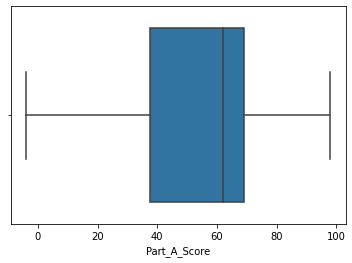

In [15]:
#use boxplot to find any outliers at Part_A_Score column
sns.boxplot(x=df["Part_A_Score"])

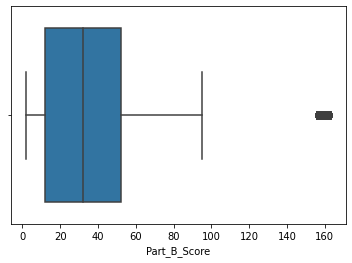

In [16]:
#use boxplot to find anny outliers at Part_B_Score column
sns.boxplot(x=df["Part_B_Score"])

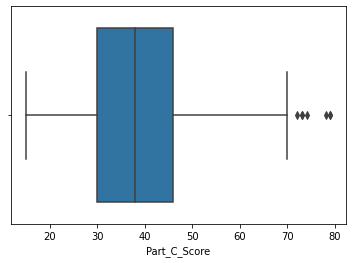

In [17]:
#use boxplot to find anny outliers at Part_B_Score column
sns.boxplot(x=df["Part_C_Score"])

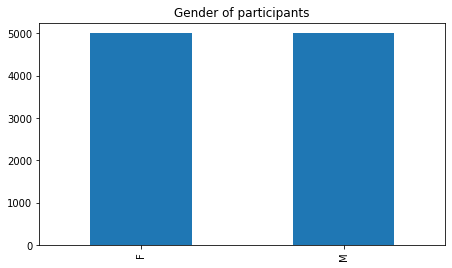

In [19]:
#draw a plot shows the number of males and females.
plt.subplot(221)

df['Gender'].value_counts().plot(kind='bar', title='Gender of participants', figsize=(16,9))

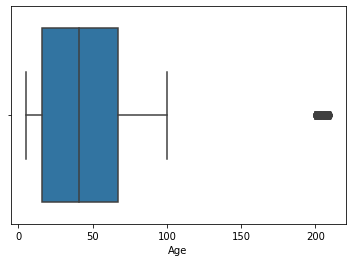

In [ ]:
#use boxplot to find anny outliers at Age column
sns.boxplot(x=df["Age"])

In [13]:
#get summary Statistics of Age column
df.Age.describe()

count    10000.000000
mean        42.973500
std         27.839811
min          5.000000
25%         16.000000
50%         41.000000
75%         63.000000
max        100.000000
Name: Age, dtype: float64

In [11]:
#this code is used to get the rows which has an age above 100
np.where(df.Age > 100)

(array([], dtype=int64),)

In [10]:
#assigned the unrealistic ages thats above 100 to the age mean 46
for i in range(df.shape[0]): 
  if df.Age.iloc[i] > 100:
      df.Age.iloc[i] = 46
  
print(np.where(df['Age']>100))

(array([], dtype=int64),)


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Q1. Is there a relationship between age and completion time?


In [53]:
fig = px.scatter(df, x="Age", y="Completion_Time", color="Gender", symbol="Gender")
fig

# Q2. Does age band matter regard scores?

In [57]:
fig = px.scatter_matrix(df,
    dimensions=["Part_A_Score", "Part_B_Score", "Part_C_Score"],
    color="Age_Band", symbol="Age_Band",
    title="Scatter matrix of Tasks Scores",
    labels={col:col.replace('_', ' ') for col in df.columns}) # remove underscore
fig

# Q3. In which location people take less time?

<Figure size 432x288 with 0 Axes>

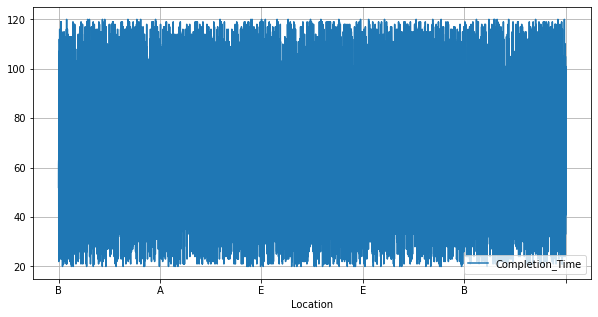

In [21]:
#fig = px.pie(df['Location'], df['Part_A_Score'],
 #            title='Population of American continent',
  #           hover_data=['Location'], labels={'Gender':'life expectancy'})
#fig.update_traces(textposition='inside', textinfo='percent+label')
#fig = px.bar(df, x="Location", y="Completion_Time", title="Long-Form Input")
#fig.show()
#df.plot(x="Location", y=["Completion_Time"], kind="bar",figsize=(12,10))
#df.plot(x = "Gender", y = "Completion_Time" , kind = "bar", legend = False)
#df.plot(x='Location', y='Completion_Time', figsize=(10,5), grid=True)
plt.figure(); df.plot(x='Location', y='Completion_Time', figsize=(10,5), grid=True); plt.legend(loc='best')

# Q4. What is the mean percentage in every task?


Text(0.5, 1.0, '38.5609')

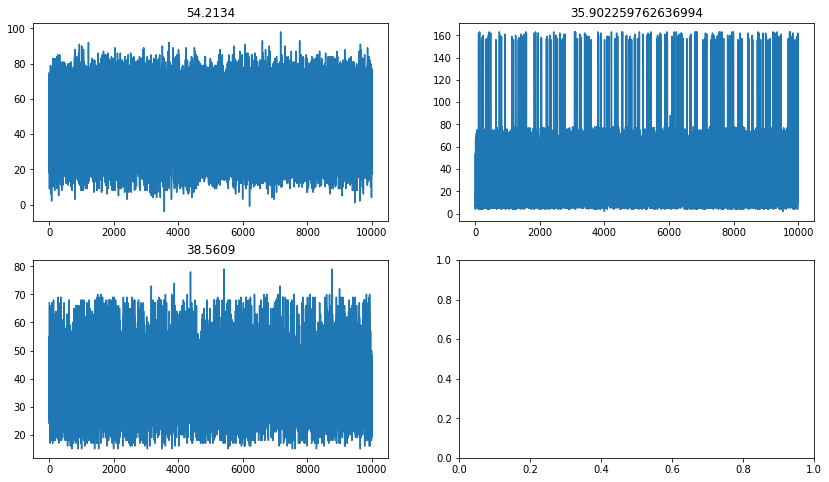

In [29]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 8))
df['Part_A_Score'].plot(ax=axes[0,0]); axes[0,0].set_title(df['Part_A_Score'].mean())
df['Part_B_Score'].plot(ax=axes[0,1]); axes[0,1].set_title(df['Part_B_Score'].mean())
df['Part_C_Score'].plot(ax=axes[1,0]); axes[1,0].set_title(df['Part_C_Score'].mean())


# Find any relationship between the features. 


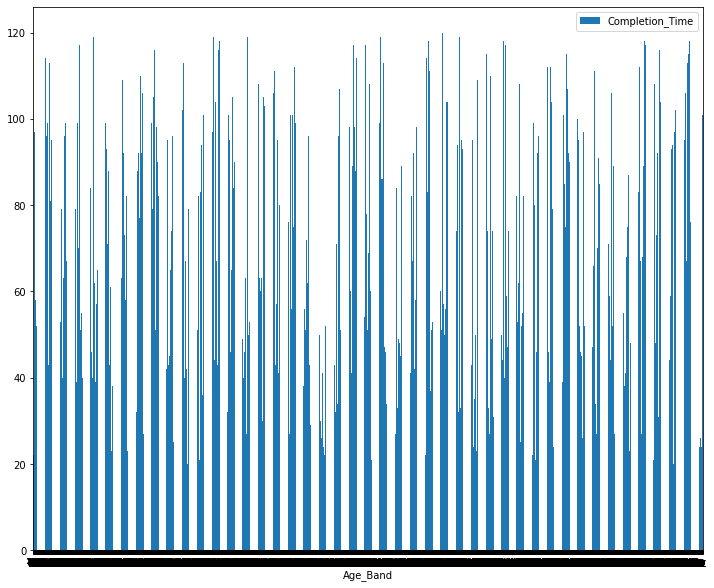

In [30]:
df.plot(x="Age_Band", y=["Completion_Time"], kind="bar",figsize=(12,10))

# What is the most interesting relationship?

<Figure size 432x288 with 0 Axes>

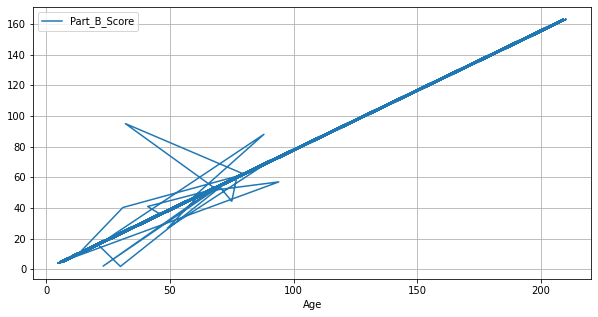

In [5]:
plt.figure(); df.plot(x='Age', y='Part_B_Score', figsize=(10,5), grid=True); plt.legend(loc='best')